In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [9]:
data = pd.read_csv("3) Sentiment dataset.csv")
data.head(5)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [10]:
data.shape

(732, 15)

In [11]:
data.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [19]:
# sns.heatmap(data.isnull())

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [22]:
x = data[["Retweets"]]
y = data["Likes"]

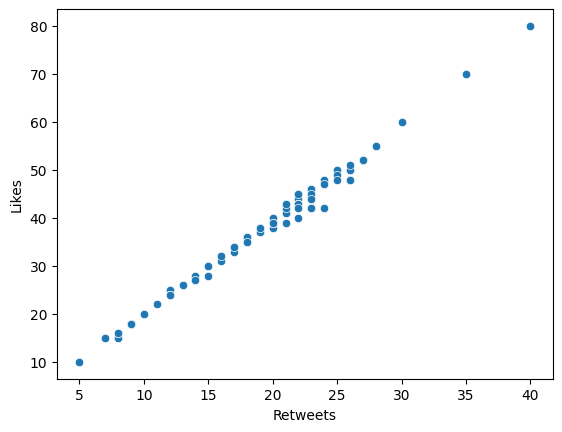

In [24]:
sns.scatterplot(x="Retweets", y="Likes", data = data)
plt.show()

In [27]:
x = data.drop(["Likes", "Text", "Sentiment", "Timestamp", "User", "Platform", "Hashtags", "Country"], axis=1)
y = data["Likes"]

In [28]:
se = StandardScaler()
x_scalar = se.fit_transform(x)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_scalar, y, test_size=0.2, random_state=42)

In [42]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [43]:
model.score(x_test, y_test)*100

99.80315534600092

In [44]:
model.coef_

array([-2.14878012e+01,  2.12896649e+01,  1.41162928e+01, -1.75825157e-02,
       -2.67244735e-02,  8.78710572e-03,  4.98998995e-02])

In [53]:
x_train_scaled = se.fit_transform(x_train)
x_test_scaled = se.transform(x_test)

y_pred=model.predict(x_test_scaled)

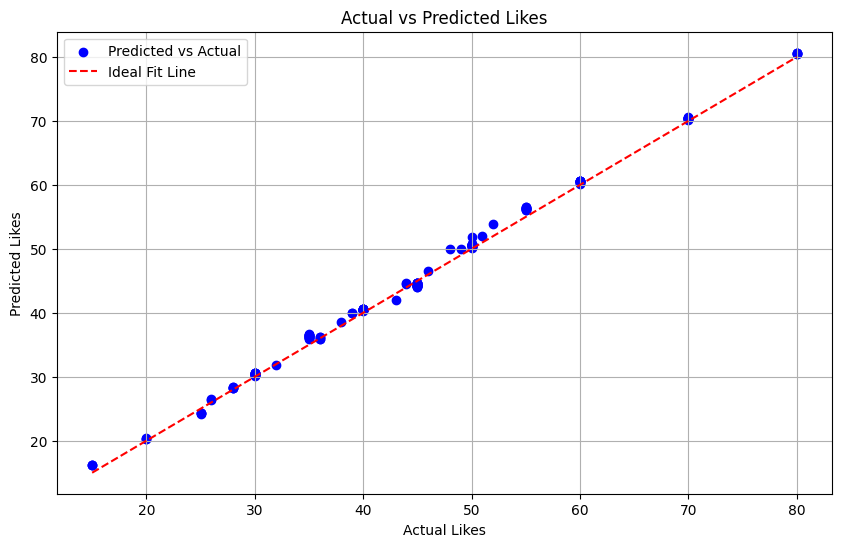

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit Line')
plt.xlabel("Actual Likes")
plt.ylabel("Predicted Likes")
plt.title("Actual vs Predicted Likes")
plt.legend()
plt.grid(True)
plt.show()

In [60]:
r2=r2_score(y_test, y_pred)
r2


0.9968959171350011

In [61]:
mse=mean_squared_error(y_test, y_pred)
mse

0.6373892066309051